# Time Series Final Project
- Christabelle Pabalan
- Shruti Roy 
- Sicheng Zhou 

In [12]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from utils import *

## 1. Exploratory Data Analysis

In [2]:
sep_date = '2015-12-31'
main_col = 'MedianSoldPrice_AllHomes.California'

In [31]:
# # purity train data, only keeping data before sep_date, after which is test data
# df_train = pd.read_csv("data/zillow-california.csv", index_col=["Date"], parse_dates=["Date"])[:sep_date]
# df_train.to_csv("data/df_train_multi_cols.csv", index=True)
# df_train_one_col = df_train[main_col]
# df_train_one_col.to_csv("data/df_train_one_col.csv", index=True)

In [3]:
df_train_one_col = pd.read_csv("data/df_train_one_col.csv", index_col=["Date"], parse_dates=["Date"])
data = df_train_one_col[main_col].values

### 1.1 Time Series Plot

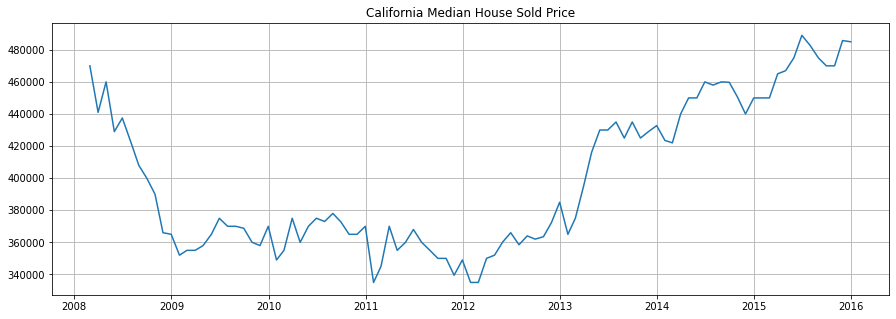

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_train_one_col)
ax.set_title("California Median House Sold Price")
ax.grid()
plt.show()

- From time series plot, we could see that the median sold price keeps dropping since 2008 until it reaches the lowest point near 2012. Then the median sold price keeps going up.

### 1.1 Time Series Plot with Smoothing

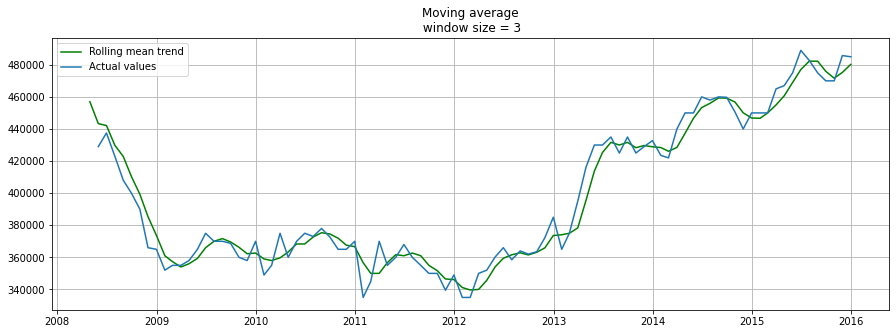

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
plot_moving_average(df_train_one_col, 3, ax=ax, plot_actual=True) 
plt.show()

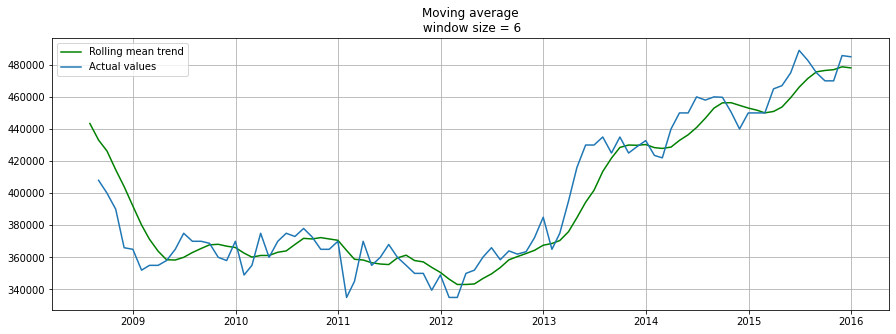

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
plot_moving_average(df_train_one_col, 6, ax=ax, plot_actual=True) 
plt.show()

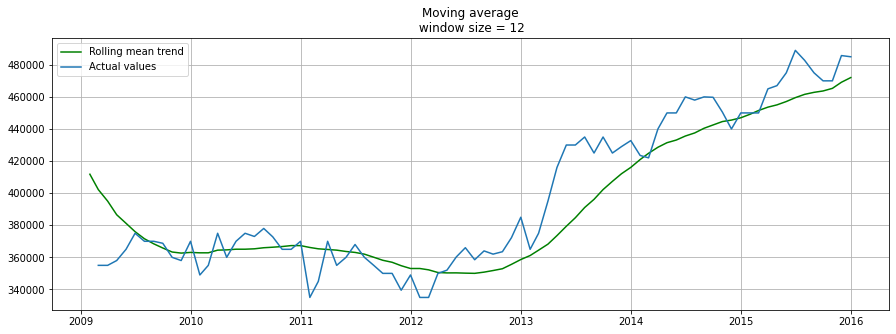

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
plot_moving_average(df_train_one_col, 12, ax=ax, plot_actual=True) 
plt.show()

### 1.1 ACF Plot

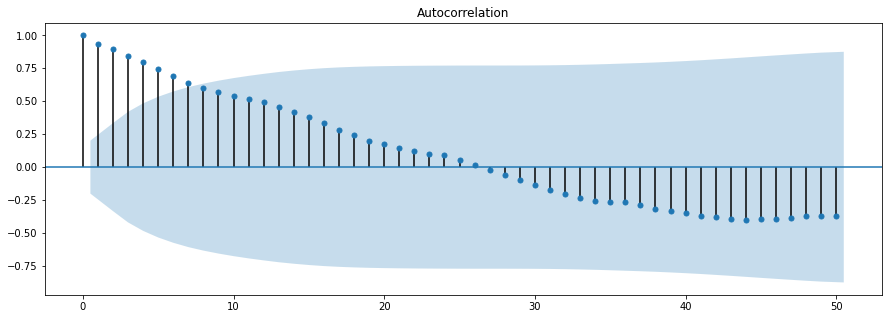

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
plot_acf(data, lags=50, ax=ax)
plt.show()

- From ACF Plot we could see that the data has good trending.

### 1.1 PACF Plot

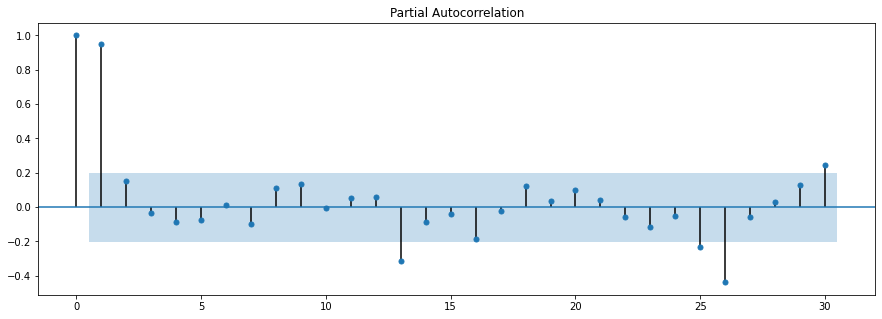

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
plot_pacf(data, lags=30, ax=ax)
plt.show()

- The PACF Plot shuts-off around lag=3, it might be an AR process with p=3

## 2. Train Different Models

### 2.1 SARIMA

#### 2.1.1 SARIMA using AIC

#### 2.1.1 SARIMA using BIC

#### 2.1.1 SARIMA using RMSE

#### 2.1.1 SARIMA using MAE

### 2.1 SARIMAX

### 2.1 Other Models That will be covered

### 2.1 Facebook Prophet

## 3. Model Selection

## 4. Forcasting on test data

## 5. Conclusion

## 6. Proportion of Work

| name | Christabelle Pabalan | Shruti Roy | Sicheng Zhou |
|-------|--------|--------|--------|
| Peer Review      |        |       |        |